<h1 align=center><font size = 5>Capstone Project for Genova</font></h1>


### Load the important libraries

In [211]:
#!pip install pandas
#!pip install requests
#!pip install bs4
#!pip install plotly
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import numpy as np
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import pandas as pd
import requests
from bs4 import BeautifulSoup
#!conda install -c conda-forge lxml --yes

print("--------Libraries imported-------")

--------Libraries imported-------


## 1. Download and Explore Dataset

### create the url variable

### get the Neighborhood from mercato-immobiliare

In [212]:
url='https://www.mercato-immobiliare.info/liguria/genova/genova.html'

### get the data and pass it to Pandas

In [213]:
tables = pd.read_html(url)

### we retrieve several tables, find the table at index for the list of Neighborhood

In [214]:

for i in range(len(tables)):
    for x in tables[i]:
        if "zona" in str(x):
            table_index=i

table_index

0

In [215]:
table=tables[table_index]

In [216]:
table

,Unnamed: 0,zona,vendita,ricerca
0,NaN,Albaro,€ 3.000 /m²,appartamenti in vendita in zona Albaro appart...
1,NaN,Apparizione,€ 2.050 /m²,appartamenti in vendita in zona Apparizione a...
2,NaN,Bavari,€ 1.500 /m²,appartamenti in vendita in zona Bavari appart...
3,NaN,Bolzaneto,€ 1.100 /m²,appartamenti in vendita in zona Bolzaneto app...
4,NaN,Borzoli,€ 1.300 /m²,appartamenti in vendita in zona Borzoli appar...
5,NaN,Carignano,€ 2.400 /m²,appartamenti in vendita in zona Carignano app...
6,NaN,Castelletto,€ 1.800 /m²,appartamenti in vendita in zona Castelletto a...
7,NaN,Centro Storico,€ 2.100 /m²,appartamenti in vendita in zona Centro Storico...
8,NaN,Certosa,€ 900 /m²,appartamenti in vendita in zona Certosa appar...
9,NaN,Cornigliano,€ 1.050 /m²,appartamenti in vendita in zona Cornigliano a...


### remove non essential columns

In [217]:
del table['Unnamed: 0']
del table['ricerca']


### remove the dot in the price value

In [218]:
table['vendita']=table['vendita'].astype(str).str.replace('.','')

### strip the symbols in the price columns and convert to integer

In [219]:
table['vendita']=table['vendita'].str[2:-3].astype(int)

### rename the columns in english

In [220]:
columns=['Neighborhood','price']

In [221]:
table.columns=columns

In [223]:
table

,Neighborhood,price
0,Albaro,3000
1,Apparizione,2050
2,Bavari,1500
3,Bolzaneto,1100
4,Borzoli,1300
5,Carignano,2400
6,Castelletto,1800
7,Centro Storico,2100
8,Certosa,900
9,Cornigliano,1050


### get the municipalities from wikipedia

In [224]:
url2='https://en.wikipedia.org/wiki/Genoa'

### pass the url to pandas html

In [225]:
tables2 = pd.read_html(url2)

In [226]:
len(tables2)

17

### we retrieve several tables, find the table at index for the list of Municipalities

In [227]:

for i in range(len(tables2)):
    for x in tables2[i]:
        if "Municipio" in str(x):
            table2_index=i

table2_index

3

In [228]:
table_mun=tables2[table2_index]
table_mun

,Municipio,Population (% of total),Quartieri
0,Centro-Est,"91,402 (15.0%)","Prè, Molo, Maddalena, Oregina [it], Lagaccio [..."
1,Centro-Ovest,"66,626 (10.9%)","Sampierdarena, Belvedere, Campasso, San Bartol..."
2,Bassa Val Bisagno,"78,791 (12.9%)","San Fruttuoso [it], Sant'Agata, Marassi [it], ..."
3,Media Val Bisagno,"58,742 (9.6%)","Staglieno [it] (Parenzo, San Pantaleo), Molass..."
4,Valpolcevera,"62,492 (10.3%)","Rivarolo, Borzoli Est, Certosa, Teglia, Begato..."
5,Medio Ponente,"61,810 (10.1%)","Sestri, Borzoli Ovest, San Giovanni Battista, ..."
6,Ponente,"63,027 (10.3%)","Voltri, Crevari, Pra' [it], Palmaro, Ca' Nuova..."
7,Medio Levante,"61,759 (10.1%)","Foce [it], Brignole, San Martino [it], Chiappe..."
8,Levante,"66,155 (10.8%)","Sturla, Quarto, Quartara, Castagna, Quinto al ..."


### rename columns

In [229]:
columns2=['Municipalities','Population','Neighborhoods']

In [230]:
table_mun.columns=columns2

In [231]:
table_mun.head()

,Municipalities,Population,Neighborhoods
0,Centro-Est,"91,402 (15.0%)","Prè, Molo, Maddalena, Oregina [it], Lagaccio [..."
1,Centro-Ovest,"66,626 (10.9%)","Sampierdarena, Belvedere, Campasso, San Bartol..."
2,Bassa Val Bisagno,"78,791 (12.9%)","San Fruttuoso [it], Sant'Agata, Marassi [it], ..."
3,Media Val Bisagno,"58,742 (9.6%)","Staglieno [it] (Parenzo, San Pantaleo), Molass..."
4,Valpolcevera,"62,492 (10.3%)","Rivarolo, Borzoli Est, Certosa, Teglia, Begato..."


### assign municipalities to neighborhood in main table

In [232]:
table['Municipalities']=''
for index, row in table.iterrows():
    for index2, row2 in table_mun.iterrows():
        list=row['Neighborhood'].split('/')
        for i in list:
            if i in row2['Neighborhoods']:
                table['Municipalities'].iloc[index]=row2['Municipalities']
            elif i == 'Sestri Ponente':                
                table['Municipalities'].iloc[index]='Medio Ponente'
            elif i == 'San Martino':
                table['Neighborhood'].iloc[index]='San Martino / Corso Europa'
            elif i == 'Quarto dei Mille':
                table['Municipalities'].iloc[index]='Levante'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [233]:
table

,Neighborhood,price,Municipalities
0,Albaro,3000,Medio Levante
1,Apparizione,2050,Levante
2,Bavari,1500,Levante
3,Bolzaneto,1100,Valpolcevera
4,Borzoli,1300,Medio Ponente
5,Carignano,2400,Centro-Est
6,Castelletto,1800,Centro-Est
7,Centro Storico,2100,
8,Certosa,900,Valpolcevera
9,Cornigliano,1050,Medio Ponente


### some Neighborhood are very small and they do not appear in municipalities

### so we drop them for the computation

In [234]:
table = table[table['Municipalities']!= '']

### we reset the index and we check the length

In [235]:
table = table.reset_index(drop=True)
len(table)


36

## 2. get locations and venues by Foursquare agent

In [236]:
import requests # library to handle requests
CLIENT_ID = '34E5GWWWGGPEA31F4T2134AY4YLN3S5Q53SSXOSBDQ04N1YD' # your Foursquare ID
CLIENT_SECRET = 'ZBUU13BP3NURT43MHLI45DKBJ0W5UP3LU0VLWYIGLWSHDWWX' # your Foursquare Secret
ACCESS_TOKEN = 'OBCKAXWCSK0HIVOFOVR0N5WMOLTPVQL51REVM1K5XE41HLMU' # your FourSquare Access Token
VERSION = '20210101'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 34E5GWWWGGPEA31F4T2134AY4YLN3S5Q53SSXOSBDQ04N1YD
CLIENT_SECRET:ZBUU13BP3NURT43MHLI45DKBJ0W5UP3LU0VLWYIGLWSHDWWX


In [237]:
table['Latitude']=''
table['Longitude']=''
for index, row in table.iterrows():   
    address = str(row['Neighborhood'])+' , Genova, Italy'
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(    latitude , longitude)
    table['Latitude'].iloc[index]=latitude
    table['Longitude'].iloc[index]=longitude
table.head()


44.3972232 8.9635865


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


44.4043028 8.9947724
44.4318 9.0179
44.4586793 8.9014681
44.4343943 8.8674748
44.4017002 8.9371173
44.4155241 8.9404142
44.4310158 8.8935341
44.4161302 8.871799
44.4243455 8.7306082
44.3994326 8.9489796
44.4169913 8.956335
44.4535379 8.9808818
44.4267627 8.8290914
44.3833121 9.0391295
44.4229882 8.9252288
44.4281651 8.775838823045179
44.4271613 8.8149219
44.4978085 8.9035055
44.3928411 8.9980192
44.4212334 8.9714694
44.437982 8.8929743
44.4126885 8.8929306
44.4224152 9.0128829
44.4079697 8.9611438
44.4474546 8.9686992
44.4071 8.9756
44.3529774 9.3587231
44.4183138 8.9105567
44.4052591 8.9425441
44.4249254 8.8499031
44.4076942 8.9300015
44.4312976 8.950586
44.4509918 9.0097302
44.3991806 8.9785847
44.4285842 8.7542329


,Neighborhood,price,Municipalities,Latitude,Longitude
0,Albaro,3000,Medio Levante,44.3972,8.96359
1,Apparizione,2050,Levante,44.4043,8.99477
2,Bavari,1500,Levante,44.4318,9.0179
3,Bolzaneto,1100,Valpolcevera,44.4587,8.90147
4,Borzoli,1300,Medio Ponente,44.4344,8.86747


### Display if we get correctly all the Neighborhood and drop any anomaly

In [238]:
# create map
# get the center of Genova
address =  'Genova, Italy'    
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_Neighborhood = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters


# add markers to the map
markers_colors = []
for lat, lon, poi in zip(table['Latitude'], table['Longitude'], table['Neighborhood']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_Neighborhood)
       
map_Neighborhood

### We spotted one outlier which we cannot get location

so we drop 'San Quirico' and check the count

In [241]:
for index,item in table.iterrows():
    if item['Neighborhood']== 'San Quirico':
        table=table.drop(table.index[index])
table=table.reset_index(drop=True)
table


,Neighborhood,price,Municipalities,Latitude,Longitude
0,Albaro,3000,Medio Levante,44.3972,8.96359
1,Apparizione,2050,Levante,44.4043,8.99477
2,Bavari,1500,Levante,44.4318,9.0179
3,Bolzaneto,1100,Valpolcevera,44.4587,8.90147
4,Borzoli,1300,Medio Ponente,44.4344,8.86747
5,Carignano,2400,Centro-Est,44.4017,8.93712
6,Castelletto,1800,Centro-Est,44.4155,8.94041
7,Certosa,900,Valpolcevera,44.431,8.89353
8,Cornigliano,1050,Medio Ponente,44.4161,8.8718
9,Crevari,1850,Ponente,44.4243,8.73061


### get near by venues

In [242]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [243]:
Genova_venues=getNearbyVenues(table['Neighborhood'], table['Latitude'], table['Longitude'], radius=1000)

Albaro
Apparizione
Bavari
Bolzaneto
Borzoli
Carignano
Castelletto
Certosa
Cornigliano
Crevari
Foce
Marassi
Molassana
Multedo
Nervi
Oregina
Palmaro / Pra'
Pegli
Pontedecimo
Quarto dei Mille
Quezzi
Rivarolo
Sampierdarena
San Desiderio
San Fruttuoso
San Gottardo/Sant'Eusebio
San Martino / Corso Europa
San Teodoro
San Vincenzo
Sestri Ponente
Sottoripa / Maddalena / Molo
Staglieno
Struppa
Sturla
Voltri


In [244]:
Genova_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albaro,44.397223,8.963586,Ristorante Pizzeria Del Ponte,44.398607,8.964006,Ligurian Restaurant
1,Albaro,44.397223,8.963586,Corso Italia,44.392244,8.960588,Road
2,Albaro,44.397223,8.963586,Pizzeria del Ponte,44.392950,8.970780,Pizza Place
3,Albaro,44.397223,8.963586,Le Cicale in Albaro,44.399178,8.960728,Restaurant
4,Albaro,44.397223,8.963586,Il Baretto,44.391808,8.967405,Cocktail Bar


### check how many venues found

In [245]:
Genova_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albaro,50,50,50,50,50,50
Apparizione,7,7,7,7,7,7
Bavari,7,7,7,7,7,7
Bolzaneto,6,6,6,6,6,6
Borzoli,6,6,6,6,6,6
Carignano,100,100,100,100,100,100
Castelletto,72,72,72,72,72,72
Certosa,5,5,5,5,5,5
Cornigliano,26,26,26,26,26,26


#### Let's find out how many unique categories can be curated from all the returned venues



In [246]:
print('There are {} uniques categories.'.format(len(Genova_venues['Venue Category'].unique())))

There are 141 uniques categories.


## 3. Analyze Each Neighborhood



In [247]:
# one hot encoding
Genova_onehot = pd.get_dummies(Genova_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood  column back to dataframe on first column neighborhood
Genova_onehot.insert(0, 'Neighborhood', Genova_venues['Neighborhood'] )

Genova_onehot.head()

,Neighborhood,Aquarium,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,...,Theater,Toll Booth,Toll Plaza,Toy / Game Store,Track Stadium,Trail,Train Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Shop
0,Albaro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albaro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albaro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albaro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albaro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [248]:
Genova_grouped = Genova_onehot.groupby('Neighborhood').mean().reset_index()
Genova_grouped.head()


,Neighborhood,Aquarium,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,...,Theater,Toll Booth,Toll Plaza,Toy / Game Store,Track Stadium,Trail,Train Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Shop
0,Albaro,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.04,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,Apparizione,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.00,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,Bavari,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,Bolzaneto,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,...,0.166667,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0
4,Borzoli,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.00,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0


#### Let's print each neighborhood along with the top 5 most common venues



In [249]:
num_top_venues = 5

for hood in Genova_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Genova_grouped[Genova_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albaro----
          venue  freq
0   Pizza Place  0.10
1         Beach  0.10
2          Café  0.10
3         Hotel  0.08
4  Cocktail Bar  0.06


----Apparizione----
               venue  freq
0              Plaza  0.14
1       Soccer Field  0.14
2        Pizza Place  0.14
3             Bakery  0.14
4  Convenience Store  0.14


----Bavari----
                venue  freq
0  Italian Restaurant  0.29
1             Dog Run  0.29
2         Pizza Place  0.14
3             Stables  0.14
4        Soccer Field  0.14


----Bolzaneto----
              venue  freq
0           Theater  0.17
1       Pizza Place  0.17
2           Stadium  0.17
3  Toy / Game Store  0.17
4       Coffee Shop  0.17


----Borzoli----
                    venue  freq
0            Soccer Field  0.17
1                 Stadium  0.17
2           Train Station  0.17
3                  Bakery  0.17
4  Furniture / Home Store  0.17


----Carignano----
                 venue  freq
0   Italian Restaurant  0.16
1                Pla

#### Let's put that into a _pandas_ dataframe



First, let's write a function to sort the venues in descending order.



In [250]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [251]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Genova_grouped['Neighborhood']
# adjust price table in classes
table['price_class']=''
for index, row in table.iterrows():   
    table['price_class'].iloc[index]=int(table['price'].iloc[index]/500)
for ind in np.arange(Genova_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Genova_grouped.iloc[ind, :], num_top_venues)
#Genova_grouped.insert(1, 'Price_class', table.price_class)

neighborhoods_venues_sorted.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albaro,Pizza Place,Beach,Café,Hotel,Plaza
1,Apparizione,Pizza Place,Convenience Store,Gym / Fitness Center,Soccer Field,Bakery
2,Bavari,Italian Restaurant,Dog Run,Soccer Field,Pizza Place,Stables
3,Bolzaneto,Pizza Place,Coffee Shop,Toy / Game Store,Health Food Store,Theater
4,Borzoli,Furniture / Home Store,Train Station,Stadium,Bakery,Soccer Field


## 4. Cluster Neighborhoods



first we need to test which is best clustering k value

In [252]:
distortions = []
K = range(1,10)
Genova_grouped_clustering = Genova_grouped.drop('Neighborhood', 1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Genova_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

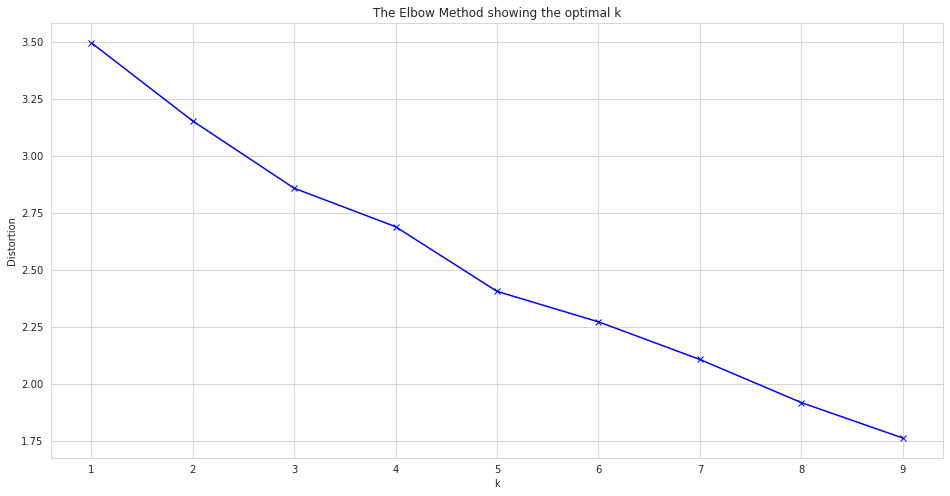

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
sns.set_style(style="whitegrid")
plt.title('The Elbow Method showing the optimal k')
plt.savefig('Elbough.png')
plt.show()

In [254]:
print('There are {} uniques categories.'.format(len(Genova_venues['Venue Category'].unique())))
unique=Genova_venues['Venue Category'].unique()

There are 141 uniques categories.


In [255]:
sorted([x for x in Genova_venues['Venue Category'].unique()])

['Aquarium',
 'Art Gallery',
 'Art Museum',
 'Asian Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Bakery',
 'Bar',
 'Baseball Field',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Big Box Store',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Burger Joint',
 'Bus Station',
 'Bus Stop',
 'Cafeteria',
 'Café',
 'Campground',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Cupcake Shop',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Dog Run',
 'Eastern European Restaurant',
 'Electronics Store',
 'Event Space',
 'Farmers Market',
 'Fast Food Restaurant',
 'Flea Market',
 'Food',
 'Food & Drink Shop',
 'Food Court',
 'French Restaurant',
 'Fried Chicken Joint',
 'Furniture / Home Store',
 'Garden',
 'Garden Center',
 'Gastropub',
 'German Restaurant',
 'Gift Shop',
 'Gourmet Shop',
 'Grocery Store',
 'Gym',
 'Gym / F

as ou can see we have a lot of venues that are same category but slighly different name.
need to be adjusted for a better prediction.
lest'scout and see what we can do

In [256]:
#Genova_venues['BAR']
# coffe shops list
new_cat=[['bar','breakfast','ice cream','café','cocktail','lounge','cafeteria'],
         ['hotel','bed & breakfast','hostel'],
         ['food','bistro','fried chicken','bbq joint','brewery','diner','burger','home service','restaurant','cheese','trattoria','steakhouse','sandwich','pizza','bakery','noodle','Piadineria','snack','soup'],
         ['leisure','planetarium','music venue','event','bowling','cinema','opera house','multiplex','pub','museum','rock club','stadium','theater','gallery','aquarium','nightclub','playground'],
         ['sport','baseball','campground','gym','tennis','pool','sports club','stables','soccer','racetrack'],
         ['shop','shopping','mall','store','supermarket','toy','market'],
         ['transportation','intersection','boat','bridge','bus stop','train','junction','harbor','pier','road','toll','rental car','metro','station'],
         ['pet','animal','dog run'],
         ['scenary','garden','histor','trail','river','sea','beach','scenic','plaza','park','monument','outdoor'],
         ['work','industrial','studio','office','farm','platform','construction'],
         ['health','pharmacy','hospital']]
Genova_venues['New_category']=''
for index, row in Genova_venues.iterrows():
    for x in new_cat:
        for t in x:
            if t  in row['Venue Category'].lower():
                Genova_venues['New_category'].iloc[index]=str(x[0])



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [257]:
print('There are {} uniques categories.'.format(len(Genova_venues['New_category'].unique())))
print(Genova_venues['New_category'].unique())

There are 11 uniques categories.
['food' 'transportation' 'bar' 'shop' 'sport' 'scenary' 'hotel' 'pet'
 'leisure' 'health' 'work']


now we can confirm we assigned all of them to a new category (wider)

In [258]:
for index, item in Genova_venues.iterrows():
    if item['New_category'] == '':
        print (item['Venue Category'])
        

### reapply onehot encoding to the new dataset 

In [259]:
# one hot encoding
Genova_onehot_t2 = pd.get_dummies(Genova_venues[['New_category']], prefix="", prefix_sep="")

# add neighborhood  column back to dataframe on first column neighborhood
Genova_onehot_t2.insert(0, 'Neighborhood', Genova_venues['Neighborhood'] )

Genova_onehot_t2.head()

,Neighborhood,bar,food,health,hotel,leisure,pet,scenary,shop,sport,transportation,work
0,Albaro,0,1,0,0,0,0,0,0,0,0,0
1,Albaro,0,0,0,0,0,0,0,0,0,1,0
2,Albaro,0,1,0,0,0,0,0,0,0,0,0
3,Albaro,0,1,0,0,0,0,0,0,0,0,0
4,Albaro,1,0,0,0,0,0,0,0,0,0,0


### regroup the dataset by neighborhood for modeling

In [260]:
Genova_grouped_t2 = Genova_onehot_t2.groupby('Neighborhood').mean().reset_index()
Genova_grouped_t2.head()

,Neighborhood,bar,food,health,hotel,leisure,pet,scenary,shop,sport,transportation,work
0,Albaro,0.24,0.240000,0.000000,0.08,0.000000,0.000000,0.200000,0.080000,0.100000,0.060000,0.0
1,Apparizione,0.00,0.285714,0.000000,0.00,0.000000,0.000000,0.142857,0.142857,0.285714,0.142857,0.0
2,Bavari,0.00,0.428571,0.000000,0.00,0.000000,0.285714,0.000000,0.000000,0.285714,0.000000,0.0
3,Bolzaneto,0.00,0.166667,0.166667,0.00,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.0
4,Borzoli,0.00,0.166667,0.000000,0.00,0.333333,0.000000,0.000000,0.166667,0.166667,0.166667,0.0


### check histogram with number of venues per Neighborhood

In [261]:
check_t2 = Genova_onehot_t2.groupby('Neighborhood').sum().reset_index()
check_t2.head()

,Neighborhood,bar,food,health,hotel,leisure,pet,scenary,shop,sport,transportation,work
0,Albaro,12,12,0,4,0,0,10,4,5,3,0
1,Apparizione,0,2,0,0,0,0,1,1,2,1,0
2,Bavari,0,3,0,0,0,2,0,0,2,0,0
3,Bolzaneto,0,1,1,0,2,0,0,2,0,0,0
4,Borzoli,0,1,0,0,2,0,0,1,1,1,0


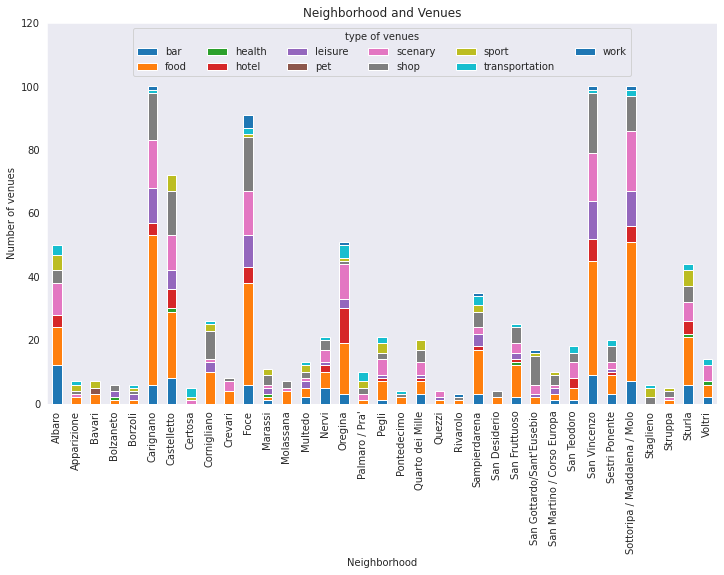

In [286]:
check_t2.set_index('Neighborhood',inplace=True)
import seaborn as sns
sns.set_style("dark")
plotdata = check_t2
plotdata.plot(kind="bar",stacked=True,figsize=(12,7)).legend(
    loc='upper center', ncol=6, title="type of venues")
plt.title("Neighborhood and Venues")
plt.ylabel("Number of venues")
plt.yticks(range(0, 140,20))
plt.savefig('NB_Venues.png')
plt.show()

### retest the dataset to see if we get better segmentation

In [266]:
distortions = []
K = range(1,10)
Genova_grouped_clustering_t2 = Genova_grouped_t2.drop('Neighborhood', 1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Genova_grouped_clustering_t2)
    distortions.append(kmeanModel.inertia_)

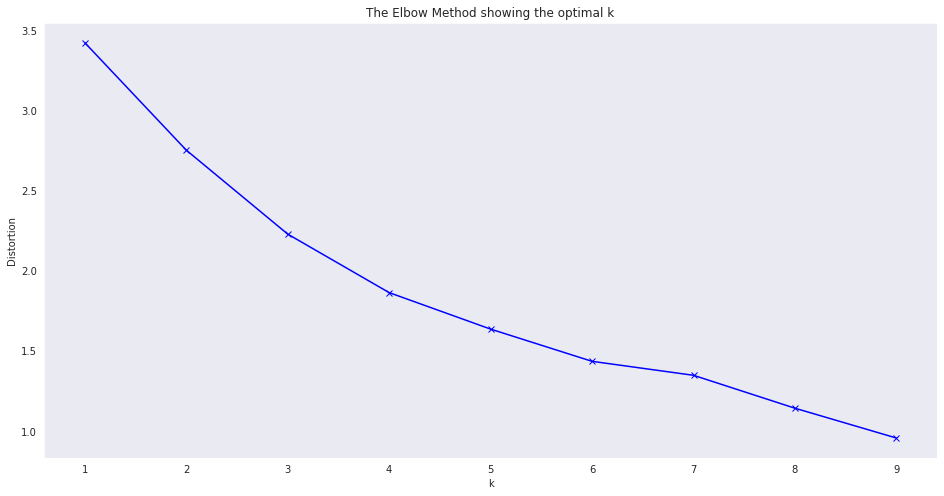

In [267]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
sns.set_style("whitegrid")

plt.title('The Elbow Method showing the optimal k')
plt.savefig('Elbough2.png')
plt.show()

In [268]:
# set number of clusters
kclusters = 4



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Genova_grouped_clustering_t2)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 3, 3, 1, 1, 2, 0, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [269]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Genova_merged = table

# merge to add latitude/longitude for each neighborhood
Genova_merged = Genova_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Genova_merged.head() # check the last columns!

,Neighborhood,price,Municipalities,Latitude,Longitude,price_class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albaro,3000,Medio Levante,44.3972,8.96359,6,1,Pizza Place,Beach,Café,Hotel,Plaza
1,Apparizione,2050,Levante,44.4043,8.99477,4,1,Pizza Place,Convenience Store,Gym / Fitness Center,Soccer Field,Bakery
2,Bavari,1500,Levante,44.4318,9.0179,3,1,Italian Restaurant,Dog Run,Soccer Field,Pizza Place,Stables
3,Bolzaneto,1100,Valpolcevera,44.4587,8.90147,2,3,Pizza Place,Coffee Shop,Toy / Game Store,Health Food Store,Theater
4,Borzoli,1300,Medio Ponente,44.4344,8.86747,2,3,Furniture / Home Store,Train Station,Stadium,Bakery,Soccer Field


let's visualize the resulting clusters

In [270]:
# create map
# get the center of Genova
address =  'Genova, Italy'    
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Genova_merged['Latitude'], Genova_merged['Longitude'], Genova_merged['Neighborhood'], Genova_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [271]:
map_clusters.save("Cluster_all.html")

## 5. Examine Clusters



Now, we examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.



### Cluster 1

In [272]:
Cluster1=Genova_merged.loc[Genova_merged['Cluster Labels'] == 0]
Cluster1

,Neighborhood,price,Municipalities,Latitude,Longitude,price_class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Cornigliano,1050,Medio Ponente,44.4161,8.8718,2,0,Multiplex,Fast Food Restaurant,Pizza Place,Big Box Store,Piadineria
12,Molassana,1300,Media Val Bisagno,44.4535,8.98088,2,0,Pizza Place,Trattoria/Osteria,Home Service,Seafood Restaurant,Electronics Store
18,Pontedecimo,1050,Valpolcevera,44.4978,8.90351,2,0,Dessert Shop,Pizza Place,Train Station,Mediterranean Restaurant,Food
21,Rivarolo,900,Valpolcevera,44.438,8.89297,1,0,Chinese Restaurant,Construction & Landscaping,Food & Drink Shop,Flea Market,Furniture / Home Store
23,San Desiderio,1450,Levante,44.4224,9.01288,2,0,Diner,Italian Restaurant,Other Repair Shop,Music Store,Eastern European Restaurant


In [273]:
address =  'Genova, Italy'    
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(1000,4000,250)
ys = [i + x + (i*x)**2 for i in range(1000,4000,250)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(Cluster1['Latitude'], Cluster1['Longitude'], Cluster1['Neighborhood'], Cluster1['Cluster Labels'], Cluster1['price']):
    label = folium.Popup(str(poi) + ' price per m2 ' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[int(round(price-1000)/250)],
        fill=True,
        fill_color=rainbow[int(round(price-1000)/250)],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters



In [274]:
map_clusters.save("Cluster1.html")

### Cluster 2

In [275]:
Cluster2=Genova_merged.loc[Genova_merged['Cluster Labels'] == 1]
Cluster2

,Neighborhood,price,Municipalities,Latitude,Longitude,price_class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albaro,3000,Medio Levante,44.3972,8.96359,6,1,Pizza Place,Beach,Café,Hotel,Plaza
1,Apparizione,2050,Levante,44.4043,8.99477,4,1,Pizza Place,Convenience Store,Gym / Fitness Center,Soccer Field,Bakery
2,Bavari,1500,Levante,44.4318,9.0179,3,1,Italian Restaurant,Dog Run,Soccer Field,Pizza Place,Stables
5,Carignano,2400,Centro-Est,44.4017,8.93712,4,1,Italian Restaurant,Plaza,Ice Cream Shop,Pub,Japanese Restaurant
6,Castelletto,1800,Centro-Est,44.4155,8.94041,3,1,Italian Restaurant,Plaza,Café,Hotel,Soccer Stadium
9,Crevari,1850,Ponente,44.4243,8.73061,3,1,Beach,Italian Restaurant,Diner,BBQ Joint,Bakery
10,Foce,2150,Medio Levante,44.3994,8.94898,4,1,Plaza,Pizza Place,Italian Restaurant,Café,Ice Cream Shop
13,Multedo,1700,Ponente,44.4268,8.82909,3,1,Soccer Field,Supermarket,Pizza Place,Scenic Lookout,Irish Pub
14,Nervi,3250,Levante,44.3833,9.03913,6,1,Ice Cream Shop,Hotel,Beach,Pizza Place,Cocktail Bar
15,Oregina,1400,Centro-Est,44.423,8.92523,2,1,Hotel,Italian Restaurant,Trattoria/Osteria,Pizza Place,Plaza


In [276]:
address =  'Genova, Italy'    
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(1000,4000,250)
ys = [i + x + (i*x)**2 for i in range(1000,4000,250)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(Cluster2['Latitude'], Cluster2['Longitude'], Cluster2['Neighborhood'], Cluster2['Cluster Labels'], Cluster2['price']):
    label = folium.Popup(str(poi) + ' price per m2 ' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[int(round(price-1000)/250)],
        fill=True,
        fill_color=rainbow[int(round(price-1000)/250)],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters


In [277]:
map_clusters.save("Cluster2.html")

### Cluster 3

In [278]:
Cluster3=Genova_merged.loc[Genova_merged['Cluster Labels'] == 2]
Cluster3

,Neighborhood,price,Municipalities,Latitude,Longitude,price_class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Certosa,900,Valpolcevera,44.431,8.89353,1,2,Intersection,Gym / Fitness Center,Plaza,Train Station,Metro Station
16,Palmaro / Pra',1350,Ponente,44.4282,8.77584,2,2,Park,Ice Cream Shop,Toll Booth,Pool,Soccer Field


In [279]:
address =  'Genova, Italy'    
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(1000,4000,250)
ys = [i + x + (i*x)**2 for i in range(1000,4000,250)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(Cluster3['Latitude'], Cluster3['Longitude'], Cluster3['Neighborhood'], Cluster3['Cluster Labels'], Cluster3['price']):
    label = folium.Popup(str(poi) + ' price per m2 ' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[int(round(price-1000)/250)],
        fill=True,
        fill_color=rainbow[int(round(price-1000)/250)],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters



In [280]:
map_clusters.save("Cluster3.html")

### Cluster 4

In [281]:
Cluster4=Genova_merged.loc[Genova_merged['Cluster Labels'] == 3]
Cluster4

,Neighborhood,price,Municipalities,Latitude,Longitude,price_class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Bolzaneto,1100,Valpolcevera,44.4587,8.90147,2,3,Pizza Place,Coffee Shop,Toy / Game Store,Health Food Store,Theater
4,Borzoli,1300,Medio Ponente,44.4344,8.86747,2,3,Furniture / Home Store,Train Station,Stadium,Bakery,Soccer Field
11,Marassi,1250,Bassa Val Bisagno,44.417,8.95633,2,3,Wine Shop,Sporting Goods Shop,Event Space,Pharmacy,Plaza
25,San Gottardo/Sant'Eusebio,1200,Media Val Bisagno,44.4475,8.9687,2,3,Plaza,Food & Drink Shop,Grocery Store,Furniture / Home Store,Pool
26,San Martino / Corso Europa,1600,Medio Levante,44.4071,8.9756,3,3,Garden Center,Grocery Store,Museum,Fried Chicken Joint,Stadium
31,Staglieno,1250,Media Val Bisagno,44.4313,8.95059,2,3,Gym,Electronics Store,Toll Booth,Supermarket,Soccer Field
32,Struppa,1350,Media Val Bisagno,44.451,9.00973,2,3,Plaza,Pizza Place,Stables,Furniture / Home Store,Grocery Store


In [282]:
address =  'Genova, Italy'    
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(1000,4000,250)
ys = [i + x + (i*x)**2 for i in range(1000,4000,250)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(Cluster4['Latitude'], Cluster4['Longitude'], Cluster4['Neighborhood'], Cluster4['Cluster Labels'], Cluster4['price']):
    label = folium.Popup(str(poi) + ' price per m2 ' + str(price), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[int(round(price-1000)/250)],
        fill=True,
        fill_color=rainbow[int(round(price-1000)/250)],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters




In [283]:
map_clusters.save("Cluster4.html")

# 6. Selected Cluster 1

## analyze the price ranges

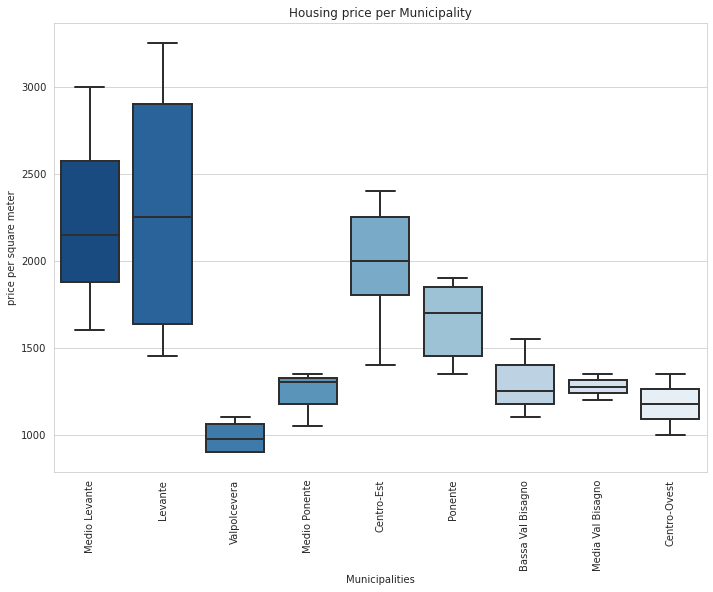

In [284]:
sns.set_style(style="whitegrid")
Genova_merged["Longitude"] = pd.to_numeric(Genova_merged["Longitude"])
Genova_merged["Latitude"] = pd.to_numeric(Genova_merged["Latitude"])


fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="Municipalities", y="price", data=Genova_merged, linewidth=2, palette='Blues_r')
plt.xlabel('Municipalities')
plt.ylabel('price per square meter')
sns.set_style("whitegrid")

plt.title('Housing price per Municipality')
plt.xticks(rotation=90)
plt.savefig('prices_municipalities.png')